# PHYS 105: Computational Physics I

## In-Class Exercise 7.2

Driven Damped Nonlinear Pendulum

Consider the motion of the nonlinear, damped, driven pendulum,
described by the equation

$$
	a ~\equiv~ \frac{d^2x}{dt^2}
          = -k\sin x -\alpha v + g\cos(\omega_Dt)\,,
$$

(where again we have replaced $\theta$ in the earlier discussion with
$x$).


   1. Compute the motion of the system and **plot ${ x(t)}$** for $x_0 =
  v_0 = 0$, $k=1$, $\alpha = 0.5$, $\omega_D = 2./3$, and $g$ = 1.0,
  1.07, 1.1, and 1.15.

  Start each calculation at time $t=0$, begin plotting trajectories at
  $t = 250$ to allow initial transients to die away, and continue each
  calculation to $t = 1500$.

  Can you see any similarities or differences between the four cases?

   2. One complicating factor is that sometimes the pendulum ``loops
  the loop'' and the angle ${ x}$ increases without bound.  **Modify**
  your program to wrap the variable ${ x}$ so that it always lies
  in the range $[-\pi,\pi]$, as follows:

        ${\tt while\ (x >  math.pi):\ x\ -= 2*math.pi}$  
        ${\tt while\ (x < -math.pi):\ x\ += 2*math.pi}$

    **Plot** the *phase-space* trajectories---${ v}$ versus wrapped
${ x}$---for each of the calculations performed in part (1).


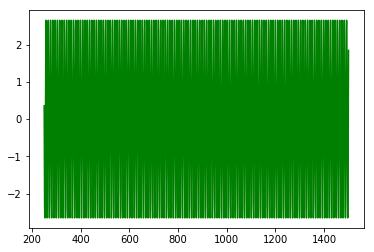

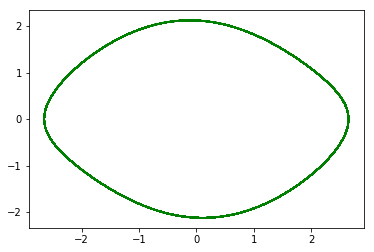

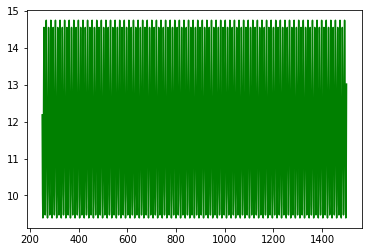

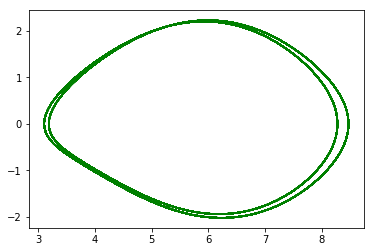

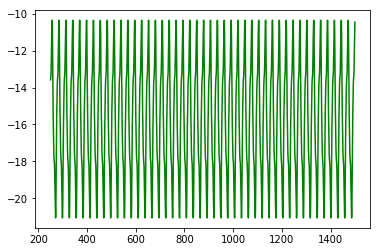

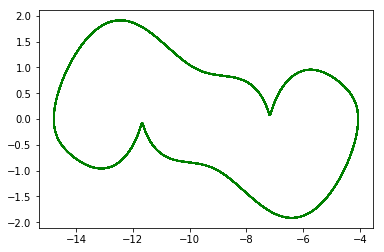

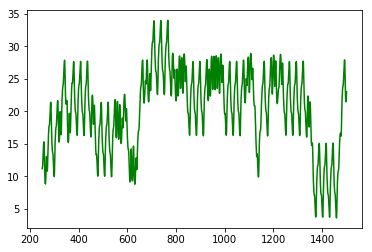

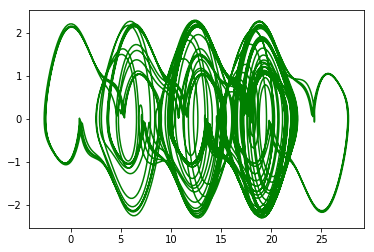

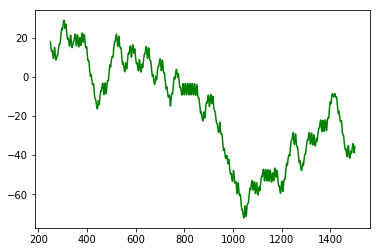

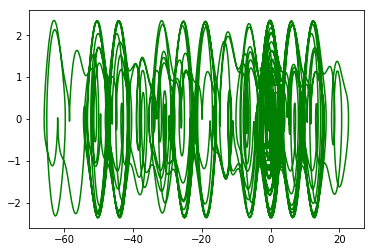

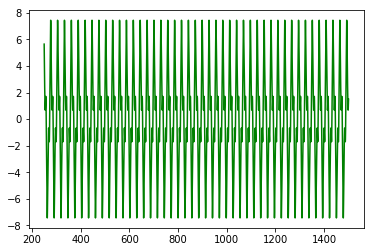

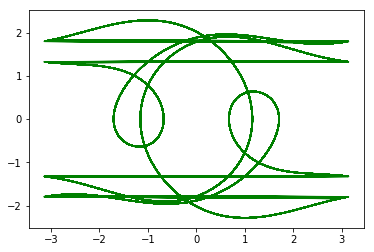

In [9]:
import sys, math
import matplotlib.pyplot as plt


def potential(x):
    return K*(1-math.cos(x)) 

def energy(x, v):
    return potential(x) + 0.5*v*v

#-------------------------------------------------------------------------

def interp(x0, y0, x1, y1, x=None, y=None):
    if y == None:
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    elif x == None:
        return (y-y0) * (x1 - x0) / (y1 - y0) + x0

def output(x, v, t):
    #print(t, x, v, energy(x, v) - E0)
    pass

def time_to_stop(x, v, t, tmax):

    # Stopping condition.

    if t > tmax:
        return 1
    else:
        return 0

def take_a_step(x, v, t, dt):

    # Take a single time step.

    a = acc(x, v, t)
    # Prediction:
    x += v*dt + 0.5*a*dt*dt
    v += a*dt
    t += dt

    # Correction:
    a1 = acc(x, v, t)
    v += 0.5*dt*(a1-a)
    
    x_bound = x
    if x > math.pi:
        x_bound = x - 2*math.pi
    if x < -math.pi:
        x_bound = x + 2*math.pi
        
    return x, x_bound, v, t

def check_amplitude(xp, x, xf, t):
#     print('{:.5f} {:.5f} {:.5f}'.format(xp, x, xf))
    if (xp < x) and (xf <= x):
        amplitude.append(x)
        time_amp.append(t)
        #amplitude_time_list.append(t)

def check_zero(xp, x, t):
    if (xp < 0) and (x >= 0):
        zeros_list.append(interp(t-dt, xp, t, x, y=0))
    if (xp > 0) and (x <= 0):
        zeros_list.append(interp(t-dt, xp, t, x, y=0))



# Global parameters.
g_list = [1,1.07,1.1,1.15, 1.2, 1.6]
for gal in g_list:
    alpha = .5
    g = gal
    wD = 2/3
    X0 = 0.0
    V0 = 0.0
    K  = 1.0
    DT = 0.1
    TMAX = 1500

    time = []
    theta = []
    v_list = []
    theta_bounded = []
   
    #-------------------------------------------------------------------------

    def acc(x, v, t):
        return -K*math.sin(x) - alpha*v + g*math.cos(wD * t)

    # Declaration and initialization.

    t = 0
    x = X0
    v = V0
    tmax = TMAX
    dt = DT

    E0 = energy(x, v)
    output(x, v, t)

    # Integrate the motion.

    while time_to_stop(x, v, t, tmax) == 0:
        (x,x_bound, v,t) = take_a_step(x, v, t, dt)
        if t > 250:
            time.append(t)
            theta.append(x)
            theta_bounded.append(x_bound)
            v_list.append(v)
            
    
    plt.figure()
    plt.plot(time, theta, 'g-')
    
    plt.figure()
    plt.plot(theta_bounded, v_list, 'g-')